In [1]:
import re
import pickle

import numpy as np
import nltk
import gensim

In [2]:
# Source paths
dataset_path = "../ssd/VT-Dataset.pkl"
google_word2vec_path = "../ssd/GoogleNews-vectors-negative300.bin"

# Destination paths
dataset_dictionary_path = "../ssd/VT-Dataset-dictionary.pkl"
google_word2vec_compressed_path = "../ssd/GoogleNews-vectors-negative300-compressed.pt"

In [3]:
with open(dataset_path, "rb") as dataset_pkl:
    dataset = pickle.load(dataset_pkl)
stopwords = nltk.corpus.stopwords.words("english")
word2vec = gensim.models.KeyedVectors.load_word2vec_format(google_word2vec_path, binary=True)

In [4]:
def collect_sentences(dataset):
    sentences = list()
    for key in dataset.keys():
        if None in dataset[key]["caption"]:
            print(dataset[key]["caption"])
        else:
            sentences += dataset[key]["caption"]
    return sentences

In [5]:
def tokenize(sentence):
    sentence = re.sub("[^a-zA-z]", " ", sentence).lower().strip()
    while (" " * 2) in sentence:
        sentence = sentence.replace(" " * 2, " ")
    words = sentence.split()
    return words

In [6]:
def remove_stopwords(words):
    words = filter(lambda word: word not in stopwords, words)
    return list(words)

In [7]:
def make_dictionary(sentences):
    avg_words = []
    missing_words = list()
    dictionary = dict()
    for s in sentences:
        words = tokenize(s)
        words = remove_stopwords(words)
        avg_words.append(len(words))
        if len(words) > 40:
            print(s)
        for w in words:
            if w in word2vec and w not in dictionary:
                dictionary[w] = len(dictionary)
            if w not in word2vec:
                missing_words.append(w)
    print(sum(avg_words) / len(sentences))
    print(max(avg_words), min(avg_words))
    print(len(set(missing_words)))
    return dictionary, avg_words


In [8]:
import matplotlib.pyplot as plt

sentences = collect_sentences(dataset)
dictionary, avgwords = make_dictionary(sentences)
with open(dataset_dictionary_path, "wb") as dataset_dict_pkl:
    pickle.dump(dictionary, dataset_dict_pkl)


A man wearing a helmet , red pants with white stripes going down the sides and a white and red shirt is on a small bicycle using only his hands while his legs are up in the air , while another man wearing a light blue shirt with dark blue trim and black pants with red stripes going up the sides is standing nearby , gesturing toward the first man and holding a small figurine of one of the seven dwarves .
Two boys are looking upwards with their arms streteched to the sky , the boy on the left is wearing a blue vest jacket with a gray long-sleeved shirt and black jogging pants , and black tennis shoes and a hat , and the boy on the right is wearing a silver vest jacket , with blue long-sleeved undershirt , gray pants , and black tennis shoes and has black short hair and glasses .
6.042347615723595
45 1
5757


(array([0.00000e+00, 1.00000e+01, 8.89000e+02, 2.12190e+04, 1.04935e+05,
        2.03487e+05, 1.91132e+05, 1.13064e+05, 5.38340e+04, 2.57980e+04,
        1.38110e+04, 8.06700e+03, 4.88900e+03, 3.13300e+03, 1.97200e+03,
        1.30400e+03, 9.00000e+02, 6.14000e+02, 3.97000e+02, 3.01000e+02,
        2.45000e+02, 1.47000e+02, 1.19000e+02, 1.00000e+02, 8.90000e+01,
        4.90000e+01, 4.40000e+01, 2.60000e+01, 2.70000e+01, 2.00000e+01,
        1.10000e+01, 8.00000e+00, 6.00000e+00, 7.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <BarContainer object of 44 artists>)

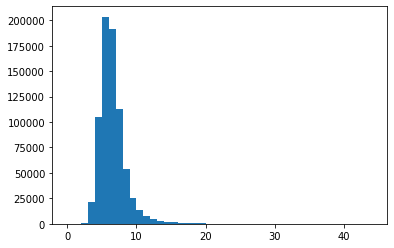

In [9]:
plt.hist(avgwords, bins=list(range(45)))

In [10]:
len(dictionary)

25536

In [11]:
n_unique_words = len(dictionary)
word2vec_compressed = np.zeros((n_unique_words, 300))
for k, v in dictionary.items():
    word2vec_compressed[v] = word2vec[k]
np.save(google_word2vec_compressed_path, word2vec_compressed)

In [12]:
word2vec_compressed.shape

(25536, 300)